# 네이버 블로그 워드클라우드 - keyword 가방 추천

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install konlpy > /dev/null

In [2]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving bag_blog.csv to bag_blog.csv


In [23]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving bag.png to bag.png


In [3]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## 1. 한글 텍스트 전처리

In [ ]:
with open(textfile) as fp:
    text = fp.read()

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
tokens = okt.nouns(text)
tokens[:10]

['제일', '명품', '가방', '추천', '메종', '마르지', '엘라', '스몰', '오늘', '제']

In [ ]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]', '', token) # \w와 동일
    if gift:
        new_tokens.append(gift)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정을 반복하여 불용어 정리

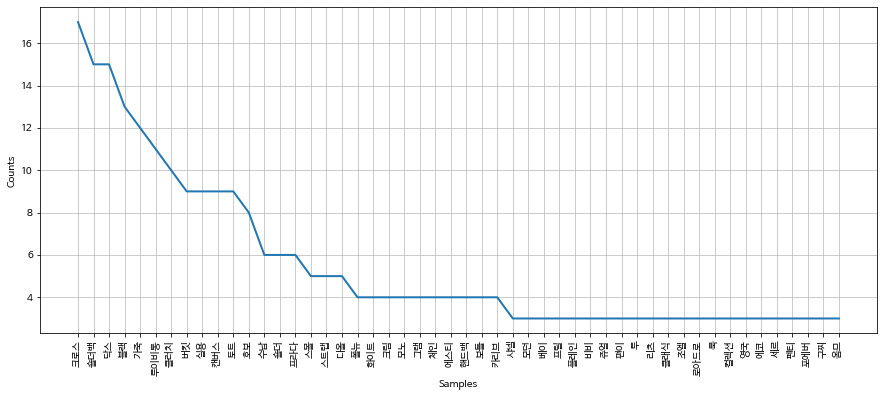

In [ ]:
bag = nltk.Text(new_tokens, name='가방 추천')
plt.figure(figsize=(15,6))
bag.plot(50)
plt.show()

In [ ]:
stoptext = """
    가방 추천 데 일리 여자 브랜드 전 디자인 것 남자 제품 여성 팩 제 수 저 액세서리 디자이너 컬러
    분 좀 백 이 정말 앤 오늘 하나 선물 때 비 가격 코디 템 여름 스타일 방추 구매 착용 더 요즘 사진 패션 해 여행 
    산 비건 후기 생각 마음 진짜 후반 바로 가을 중 캐 소개 가장 글 느낌 리뷰 또 명품 등 엄마 요 시 색 인치 이번
    지금 평소 무난 사용 혹시 거 제발 옷 가성 부담 니트 함 볼 기 민시 화보 소재 퀄리티 물놀이 뭐 르 마스크
    푸딩 쇼핑 테니스 돈 키즈 나이 다른 역시 자주 아이템 직장인 감 가지 매력 개인 그냥 중반 파리 알바 조금 안 날 개 
    라인 선 포인트 추가 인원 선호 참고 시즌 출근 및 부속 고민 포스팅 출처 녀석 강력 위템 제일 무조건 언박싱 새 리스트
    외 번 활용 눈 휴가 부분 그래픽 미만 티 샌들 애플 위해 어머님 이제 카드 시작 여기 하트 부탁 우리 라서 최근 포함
    매우 학생 고등학생 로부터 관심 매번 준비 쓰기 별로 쏙 원래 여러가지 이모
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['메종', '마르지', '엘라', '스몰', '메종', '마르지', '엘라', '스몰', '숄더백', '숄더백']

## 워드 클라우드 그리기

In [ ]:
from wordcloud import WordCloud
from PIL import Image

In [ ]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask) # 이미지 color에 맞춰서 색깔을 생성

In [ ]:
data = bag.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask, 
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

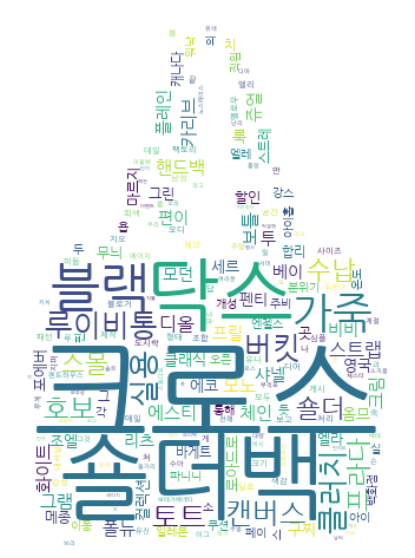

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
#plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

## 강사님 풀이

In [5]:
df = pd.read_csv(textfile)
df.head()

,title,date,content
0,"제일 잘 들고 다녔던 명품가방 추천 , 메종 마르지엘라 5ac 스몰",2021.08.16.,오늘은 제가 진짜 너무너무 잘 들고 다녀서 20대 ~ 30대 명품가방 추천해주세요 ...
1,20대 여자가방 추천 ‘JW PEI 숄더백’ 언박싱,5일 전,"JW PEI Eva 숄더백 -세이지 그린 악어 무늬 TAX 포함가 105,000원 ..."
2,"버킷백 브랜드, 닥스 액세서리 여자 가방 추천 럭셜해",7일 전,이제 저도 나이가 30대라서 너무 인지도 낮은 브랜드의 가방을 착용하기엔 아쉽더라고...
3,디자이너브랜드 가방 폴뉴아 트라이백 수납력 좋은 보부상 데일리백 & 바게트 숄더백 ...,2021.08.22.,TRIBAG #가방브랜드추천 #바게트숄더백 #2030데일리백 #20대가방추천 #30...
4,화이트나 크림색 가방 추천해주세요:),6일 전,샤넬 19백은 화이트도 있구 크림도 있는건가요? 2.이 사진들은 무슨 색일까요~(퍼...


In [6]:
text = ''
for i in df.index:
    text += df.title[i] + '\n' + df.content[i] + '\n'

In [7]:
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['제일', '명품', '가방', '추천', '메종', '마르지', '엘라', '스몰', '오늘', '제']

- Okt의 한계 극복
    - 단어 추가
    - 영어, 숫자 포함 단어 변환

In [9]:
!pip install customized_konlpy > /dev/null

In [10]:
trans_dict = {'메종 마르지엘라' : '메종마르지엘라',
    '모노 그램' : '모노그램', '베이 프릴' : '베이프릴', '세르 펜티' : '세르펜티'
}
change_list = list(trans_dict.keys())

In [11]:
sentence = '제일 잘 들고 다녔던 명품가방 추천 , 메종 마르지엘라 5ac 스몰 모노 그램 베이 프릴 세르 펜티'
def change_word(sentence):
    for cword in change_list:
        sentence = sentence.replace(cword, trans_dict[cword])
    return sentence
change_word(sentence)

'제일 잘 들고 다녔던 명품가방 추천 , 메종마르지엘라 5ac 스몰 모노그램 베이프릴 세르펜티'

In [12]:
from ckonlpy.tag import Twitter
twt = Twitter()
twt.add_dictionary('메종마르지엘라', 'Noun')
twt.add_dictionary('모노그램', 'Noun')
twt.add_dictionary('베이프릴', 'Noun')
twt.add_dictionary('세르펜티', 'Noun')
twt.nouns(change_word(sentence))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['제일', '명품', '가방', '추천', '메종마르지엘라', '스몰', '모노그램', '베이프릴', '세르펜티']

In [13]:
new_text = change_word(text)
new_tokens = twt.nouns(new_text)

- 불용어 걸러내기(두 과정 반복)

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

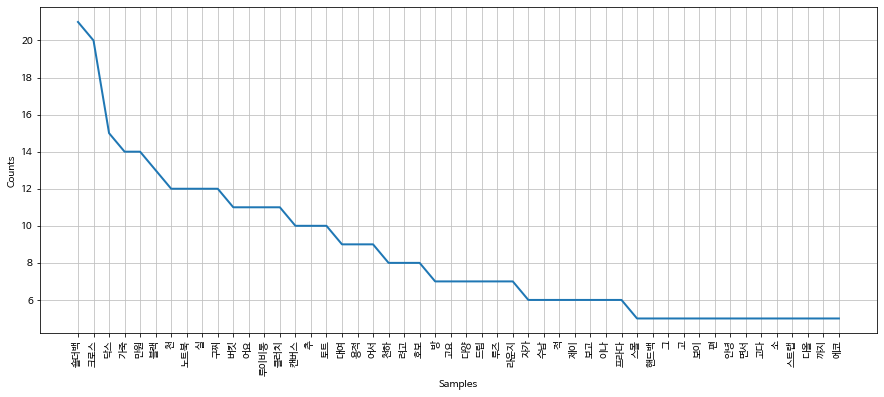

In [33]:
blog = nltk.Text(new_tokens, name='가방추천')
plt.figure(figsize=(15,6))
blog.plot(50)
plt.show()

In [32]:
stoptext = """
    가방 추천 데 일리 여자 브랜드 전 디자인 것 남자 제품 여성 팩 제 수 저 액세서리 디자이너 컬러
    분 좀 백 이 정말 앤 오늘 하나 선물 때 비 가격 코디 템 여름 스타일 방추 구매 착용 더 요즘 사진 패션 해 여행 
    산 비건 후기 생각 마음 진짜 후반 바로 가을 중 캐 소개 가장 글 느낌 리뷰 또 명품 등 엄마 요 시 색 인치 이번
    지금 평소 무난 사용 혹시 거 제발 옷 가성 부담 니트 함 볼 기 민시 화보 소재 퀄리티 물놀이 뭐 르 마스크
    푸딩 쇼핑 테니스 돈 키즈 나이 다른 역시 자주 아이템 직장인 감 가지 매력 개인 그냥 중반 알바 조금 안 날 개 
    라인 선 포인트 추가 인원 선호 참고 시즌 출근 및 부속 고민 포스팅 출처 녀석 강력 위템 제일 무조건 언박싱 새 리스트
    외 번 활용 눈 휴가 부분 그래픽 미만 티 샌들 애플 위해 어머님 이제 카드 시작 여기 하트 부탁 우리 라서 최근 포함
    매우 학생 고등학생 로부터 관심 매번 준비 쓰기 별로 쏙 원래 여러가지 이모 해주 아직 망설 계시 면 데일 리 미니
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['메종마르지엘라', '스몰', '메종마르지엘라', '스몰', '숄더백', '숄더백', '세이지', '그린', '악어', '무늬']

- 워드 클라우드 그리기

In [20]:
from wordcloud import WordCloud
from PIL import Image

In [36]:
data = blog.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
mask = np.array(Image.open(maskfile))

In [37]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask,
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

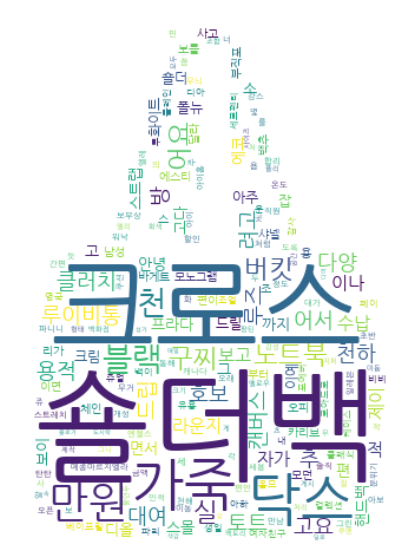

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

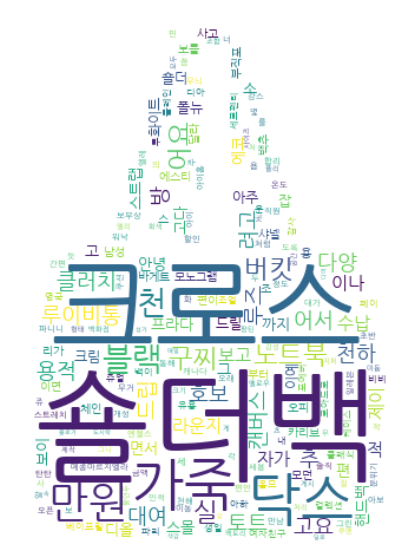

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png') # 이미지 저장